# Recommendation System

The idea is to make a recommendation system for e commerce website based upon the ratings of the product.

Online E-commerce websites like Amazon, Filpkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real time. This type of filtering matches each of the user's purchased and rated items to similar items, then combines those similar items into a recommendation list for the user. In this project we are going to build recommendation model for the electronics products of Amazon.

# Data Set Description

## There are total 4 attributes in the dataset

### userId : Contain the id for each and everu user
### productId : Every product has its own unique id
### ratings : Contain the rating that how a user has rated the product
### Timestamp: contain the time
 
 Timestamp is not that relevant that's why we will drop that column


# The overall work flow of the system 

1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

2. Take a subset of the dataset to make it less sparse/ denser. 

3. Split the data randomly into train and test dataset. 

4. Build Popularity Recommender model.

5. Build Collaborative Filtering model.

6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.



In [1]:
#pip installation of surprise package
!pip install surprise

In [2]:
#Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

In [4]:
# Giving column names to the data
columns = ['userID', 'productID', 'ratings','timestamp']
recomm_df = pd.read_csv('ratings_Electronics.csv',names=columns)

In [5]:
#Dispalying information of the data
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
# Displaying top 5 enteries of the dataset
recomm_df.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [7]:
#Shape of the data
recomm_df.shape

(7824482, 4)

In [8]:
#Describing the dataset(mean, standard deviation, min, max )
recomm_df.describe()

,ratings,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


# Dropped timestamp as it is irrelevant for the model

In [9]:
recomm_df = recomm_df.drop('timestamp', axis=1)

# Checking for the missing values

In [10]:
recomm_df.isna().sum()

userID       0
productID    0
ratings      0
dtype: int64

## No missing value in the dataset

In [11]:
recomm_df.shape

(7824482, 3)

## Plotting Histogram for the ratings

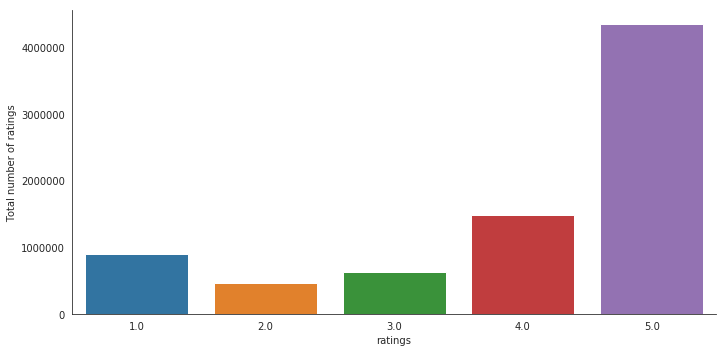

In [12]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=recomm_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## Dispaying the most popular products among the users

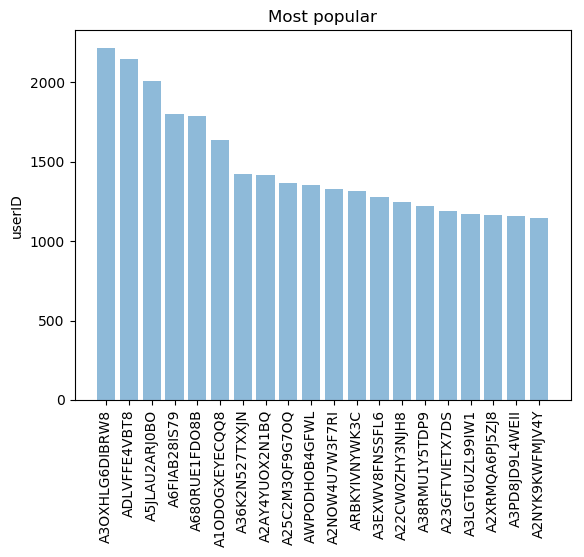

In [13]:
popular = recomm_df[['userID','ratings']].groupby('userID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['userID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userID')
plt.title('Most popular')
 
plt.show()

In [14]:
recomm_df.userID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A16VZHAJ66J0MT      1
A3OH1Y7AWAP8GA      1
A3DRQHK6CCOGBC      1
A2A8G7T2TLDMX5      1
A48UB8VA388K0       1
Name: userID, Length: 4201696, dtype: int64

In [15]:
print('Number of unique users', len(recomm_df['userID'].unique()))

Number of unique users 4201696


In [16]:
print('Number of unique products', len(recomm_df['productID'].unique()))


Number of unique products 476002


In [17]:
print('Unique Ratings', recomm_df['ratings'].unique())

Unique Ratings [5. 1. 3. 2. 4.]


In [18]:
min_ratings1 = recomm_df[(recomm_df['ratings'] < 2.0)]

In [19]:
print('Number of unique products rated low',len(min_ratings1['productID'].unique()))

Number of unique products rated low 176283


In [20]:
med_ratings1 = recomm_df[(recomm_df['ratings'] > 2.0) & (recomm_df['ratings'] < 4.0)]

In [21]:
print('Number of unique products rated medium',len(med_ratings1['productID'].unique()))

Number of unique products rated medium 152827


In [22]:
max_ratings1 = recomm_df[recomm_df['ratings'] >= 4.0]

In [23]:
print('Number of unique products rated high',len(max_ratings1['productID'].unique()))

Number of unique products rated high 410110


In [24]:
avg_rating_prod = recomm_df.groupby('productID').sum() / recomm_df.groupby('productID').count()

In [25]:
avg_rating_prod.drop('userID', axis=1,inplace =True)

In [26]:
print ('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0
0594450209      5.0
0594450705      5.0
0594511488      5.0
0594514789      5.0
0594549558      5.0


In [27]:
counts=recomm_df.userID.value_counts()
electronics_df1_final=recomm_df[recomm_df.userID.isin(counts[counts>=15].index)]
print('Number of users who have rated 15 or more items =', len(electronics_df1_final))
print('Number of unique users in the final data = ', electronics_df1_final['userID'].nunique())
print('Number of unique products in the final data = ', electronics_df1_final['userID'].nunique())


Number of users who have rated 15 or more items = 661012
Number of unique users in the final data =  25910
Number of unique products in the final data =  25910


#  Choosing a more relevant subset from the dataset for further processing 
# THis will reduce sparsity in the data 

## keep the users only who has given 50 or more number of ratings

In [28]:
userID = recomm_df.groupby('userID').count()

In [29]:
top_user = userID[userID['ratings'] >= 50].index

In [30]:
topuser_ratings_df = recomm_df[recomm_df['userID'].isin(top_user)]

In [31]:
topuser_ratings_df.shape

(125871, 3)

In [32]:
topuser_ratings_df.head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [33]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0


In [34]:
prodID = recomm_df.groupby('productID').count()

In [35]:
top_prod = prodID[prodID['ratings'] >= 50].index

In [36]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]

In [37]:
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


In [38]:
top_ratings_df.shape

(79182, 3)

## Splitting the data into test and train dataset

In [39]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

In [40]:
#Displaying top 5 rows of training dataset
train_data.head()

,userID,productID,ratings
3679937,A2W0XCWOK3MW6F,B003Y74AXO,3.0
3603561,A2E1EFNIZL2FVA,B003VANO7C,5.0
6945634,AR3EVUQF0AC7R,B00ARB5FLQ,4.0
2732999,A38RMU1Y5TDP9,B002NGVY8G,1.0
7715921,A1JZFGZEZVWQPY,B00GRNUO2I,3.0


In [41]:
#Displaying top 5 rows of test dataset
test_data.head()

,userID,productID,ratings
6562653,AWH2AY17ZU7W2,B009A6CZ30,5.0
1001830,A1SHHQSPOWR00F,B000HGIWN4,3.0
3904732,A1PVJICI412IN4,B00466X9SY,5.0
7600678,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
2743475,AMKNPIDFLRFMP,B002O3W2OI,2.0


# Recommendation model based on the popularity of product

In [42]:
#Building the recommendations based on the average of all user ratings for each product.
#train_data_grouped = train_data.groupby('productID').mean().reset_index()
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productID').agg({'userID': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userID': 'score'},inplace=True)
train_data_grouped.head(40)

,productID,score
0,0972683275,2
1,1400501466,4
2,1400501520,1
3,1400501776,1
4,1400532620,1
5,1400532655,4
6,140053271X,1
7,1400599997,4
8,3744295508,1
9,9573212919,1


In [43]:
train_data_grouped.head()

,productID,score
0,0972683275,2
1,1400501466,4
2,1400501520,1
3,1400501776,1
4,1400532620,1


In [44]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productID'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,productID,score,rank
12222,B0088CJT4U,135,1.0
7485,B003ES5ZUU,128,2.0
12003,B007WTAJTO,123,3.0
2919,B000N99BBC,122,4.0
12110,B00829TIEK,102,5.0


In [45]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

## Top 5 recommendations for different userID

In [46]:
find_recom = [10,37,78,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 10

       userId   productID  score  rank
12222      10  B0088CJT4U    135   1.0
7485       10  B003ES5ZUU    128   2.0
12003      10  B007WTAJTO    123   3.0
2919       10  B000N99BBC    122   4.0
12110      10  B00829TIEK    102   5.0


The list of recommendations for the userId: 37

       userId   productID  score  rank
12222      37  B0088CJT4U    135   1.0
7485       37  B003ES5ZUU    128   2.0
12003      37  B007WTAJTO    123   3.0
2919       37  B000N99BBC    122   4.0
12110      37  B00829TIEK    102   5.0


The list of recommendations for the userId: 78

       userId   productID  score  rank
12222      78  B0088CJT4U    135   1.0
7485       78  B003ES5ZUU    128   2.0
12003      78  B007WTAJTO    123   3.0
2919       78  B000N99BBC    122   4.0
12110      78  B00829TIEK    102   5.0


The list of recommendations for the userId: 150

       userId   productID  score  rank
12222     150  B0088CJT4U    135   1.0
7485      150  B003ES

# Collaborative Recommendation model

In [47]:
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [48]:
reader = Reader(rating_scale=(0.5, 5.0))

## Converting Pandas Dataframe to Surpise format¶


In [49]:
data = Dataset.load_from_df(top_ratings_df[['userID', 'productID', 'ratings']],reader)

In [50]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [51]:
type(trainset)

surprise.trainset.Trainset

In [52]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [53]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

In [54]:
print(len(testset))
type(testset)

23755


list

In [55]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.3492063492063493, details={'actual_k': 2, 'was_impossible': False})

In [56]:
# compute RMSE
accuracy.rmse(test_pred) #range of value of error

RMSE: 0.9941


0.9940800621800723

In [57]:
test_pred = svd_model.test(testset)

In [58]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 0.9613


0.961305439742885

## Parameter Tuning of SVD Recommendation System

In [59]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [60]:
gs.fit(data)

In [61]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [62]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [63]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8580


0.8579890937165909

### The RMSE value for Collaborative Filtering model, by KNNWithMeans is 0.9941 and SVD is 0.9606. After parameter tuning of SVD it is 0.858

# Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [64]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [65]:
top_n = get_top_n(test_pred, n=5)

In [66]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28UMA3GW9L124 ['B008JJLW4M', 'B000VX6XL6', 'B000N99BBC', 'B0002D6QJO', 'B002IO2UM2']
A38NHXL5257E3B ['B00BOHNYU6', 'B003SGCO3E', 'B004Q3R9AQ', 'B00CB2F65O', 'B00829THK0']
A36IHC0K68NS2 ['B00HMREOLK', 'B009N8M2P6', 'B00ATM1MGA', 'B001FAACHK', 'B004ING996']
A231WM2Z2JL0U3 ['B00006HZ0L', 'B00008OE6I', 'B00004RC2D', 'B00005OQMO', 'B00005AC8J']
A2AC6GQ24S45GA ['B000PGHCG4', 'B001TOD7ME', 'B001S2RCWI', 'B009E6J1BU', 'B00884WH74']
A3OXHLG6DIBRW8 ['B001T9NUJE', 'B002VPE1X4', 'B001ID829O', 'B004CLYEFK', 'B001TH7GVE']
A2XA8CW5DF4MNZ ['B000TKHBDK', 'B00387EW1K', 'B001TOD7ME', 'B005BCCML2', 'B0025ZH43O']
AG35JCCQWDRCS ['B0036Q7MV0', 'B000068O16', 'B0045TYDNC', 'B00AXTQQDS', 'B003ZSHNE0']
A2X3L31KCXBHCL ['B00829THEG', 'B0044DEDC0', 'B00DQZQ5T6', 'B006WHPQE0', 'B000B63KSM']
A33YZNZIRA3H97 ['B00BOHNYTW', 'B00HFRWWAM', 'B00006I5J7', 'B00BFO14W8', 'B004MT7GGG']
AX05DBU8IRUWY ['B003ZBZ64Q', 'B006W8U2MU', 'B001FO4QHI', 'B00H4OWPE4', 'B00FISD9DO']
A296QED1MV1V0J ['B008AST7R6', 'B0058G40O8', 'B00CFCTDMC',

# Summarizing Insights

### We had read and explored the dataset. Considered only first three columns userId, productId, and ratings.
### Analysed the data and plotted the histogram based on ratings and usedID.
### We had Split the data randomly into train and test dataset.


### Build Collaborative Filtering model.The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9941 and SVD is 0.9606. After parameter tuning of SVD it is 0.858

### We had recommended new products to each user based on his/her habits and have recommended 5 new products.
### Between RMSE of Popularity and Collaborative filtering , Collaborative fitering fares better with 0.86 scores.

### Collaborative filtering uses user's behaviour (in this case explicit ratings to give) similar items / similar users and recomend products accordingly

### Popularity based algorithm have their used cases when user would just like to browse most popular items

### The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.We can see the differance above for the user id 4, 6 & 8, The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.

### Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.